In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATA_DIR = r'/content/drive/MyDrive/face/train'
DATA_DIR1 = r'/content/drive/MyDrive/face/test'

In [3]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
CATEGORIES_T = []

for i in os.listdir(DATA_DIR):
    CATEGORIES_T.append(i)

print(CATEGORIES_T)

['zerin', 'Taj', 'Talha', 'SUN', 'Sintheia', 'SHUVO', 'Tahsin Kabir', 'Tahsin', 'Siam', 'Sumaiya', 'Saif', 'Rono', 'Sadi', 'Shatabdi', 'Sayem', 'Sakib', 'Shakibul', 'SHOHIDUL', 'Sanim', 'MAYSHA', 'Rizon', 'MRIDUL', 'Rokon', 'Rassel', 'Prachurjo', 'Ridoy', 'Nishat', 'Rafsan', 'Maishara', 'GM ABUBAKAR SIDDIQ', 'Avizit', 'Jahin', 'Dristi', 'Farhan', 'Hasib', 'Ishmam', 'Kowshik', 'Khushbu', 'Hasnatur', 'Apurba', 'ajmain', 'Abir', 'Arshad', 'Ashiq']


In [5]:
CATEGORIES_V = []

for i in os.listdir(DATA_DIR1):
    CATEGORIES_V.append(i)

print(CATEGORIES_V)

['Taj', 'zerin', 'Talha', 'Siam', 'Shatabdi', 'SUN', 'Tahsin Kabir', 'Shakibul', 'Sumaiya', 'Sintheia', 'SHUVO', 'Tahsin', 'SHOHIDUL', 'Sanim', 'Rokon', 'Rizon', 'Ridoy', 'Sadi', 'Sayem', 'Sakib', 'Rono', 'Saif', 'MAYSHA', 'Khushbu', 'Prachurjo', 'Kowshik', 'Rassel', 'Nishat', 'Maishara', 'Rafsan', 'MRIDUL', 'Jahin', 'Arshad', 'Dristi', 'Farhan', 'Ashiq', 'Hasnatur', 'Ishmam', 'Avizit', 'GM ABUBAKAR SIDDIQ', 'Apurba', 'Hasib', 'Abir', 'ajmain']


In [6]:
class_names = ['Taj', 'zerin', 'Talha', 'Siam', 'Shatabdi', 'SUN', 'Tahsin Kabir', 'Shakibul', 'Sumaiya', 'Sintheia', 'SHUVO', 'Tahsin', 'SHOHIDUL', 'Sanim', 'Rokon', 'Rizon', 'Ridoy', 'Sadi', 'Sayem', 'Sakib', 'Rono', 'Saif', 'MAYSHA', 'Khushbu', 'Prachurjo', 'Kowshik', 'Rassel', 'Nishat', 'Maishara', 'Rafsan', 'MRIDUL', 'Jahin', 'Arshad', 'Dristi', 'Farhan', 'Ashiq', 'Hasnatur', 'Ishmam', 'Avizit', 'GM ABUBAKAR SIDDIQ', 'Apurba', 'Hasib', 'Abir', 'ajmain']

In [7]:
TRANING_DIR = []
IMG_SIZE = 128
for c in CATEGORIES_T:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES_T.index(c)


    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            TRANING_DIR.append([img_resized, class_num])
        except WException as e:
            pass

print(len(TRANING_DIR))

100%|██████████| 8/8 [00:09<00:00,  1.22s/it]

270


In [8]:
IMG_SIZE = 128
VALIDATION_DIR = []
for c in CATEGORIES_T:
    path = os.path.join(DATA_DIR1, c)
    class_num = CATEGORIES_T.index(c)


    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            VALIDATION_DIR.append([img_resized, class_num])
        except WException as e:
            pass

print(len(VALIDATION_DIR))

100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

91


In [9]:

random.shuffle(TRANING_DIR)
random.shuffle(VALIDATION_DIR)

In [10]:
X_train = []
Y_train = []

for img, label in TRANING_DIR:
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1,128,128,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (270, 128, 128, 3) Y_train= (270,)


In [11]:
X_val = []
Y_val = []

for img, label in VALIDATION_DIR:
    X_val.append(img)
    Y_val.append(label)

X_val = np.array(X_val).astype('float32').reshape(-1,128,128,3)
Y_val = np.array(Y_val)

print(f"X_val= {X_val.shape} Y_val= {Y_val.shape}")

X_val= (91, 128, 128, 3) Y_val= (91,)


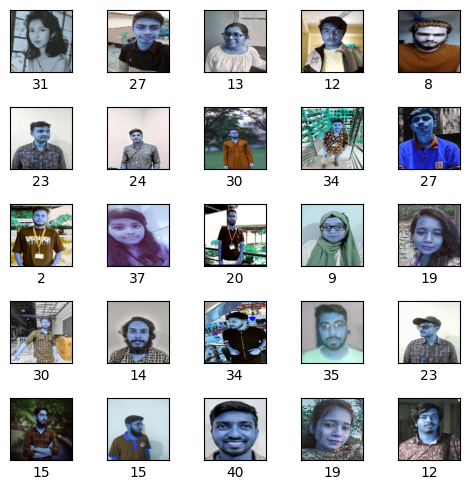

In [12]:
ROWS = 5
COLS = 5
i = 0

plt.figure(figsize=(5,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i].astype('uint8'))

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

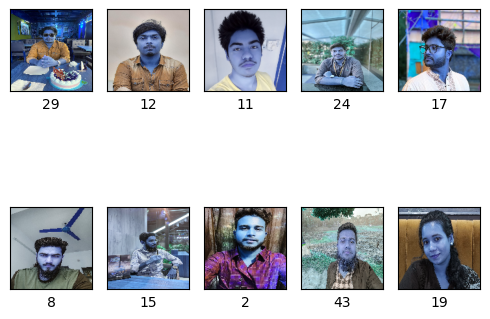

In [13]:
ROWS = 2
COLS = 5
i = 0

plt.figure(figsize=(5,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_val[i].astype('uint8'))

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_val[i])
        i += 1
plt.tight_layout()
plt.show()

In [14]:
model = keras.Sequential([
    keras.Input(shape=(128,128,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(44, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 44)                  │           2,860 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 863,596 (3.29 MB)

 Trainable params: 863,596 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
h = model.fit(x=X_train, y=Y_train, epochs=15, validation_split=0.2, batch_size=16)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.0284 - loss: 40.5506 - val_accuracy: 0.0185 - val_loss: 3.7685
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 621ms/step - accuracy: 0.0167 - loss: 3.7624 - val_accuracy: 0.0000e+00 - val_loss: 3.7835
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.0125 - loss: 3.7816 - val_accuracy: 0.0185 - val_loss: 3.8099
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 455ms/step - accuracy: 0.0503 - loss: 3.7871 - val_accuracy: 0.0185 - val_loss: 3.7951
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 557ms/step - accuracy: 0.0163 - loss: 3.7900 - val_accuracy: 0.0185 - val_loss: 3.7847
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 644ms/step - accuracy: 0.0159 - loss: 3.7793 - val_accuracy: 0.0185 - val_loss: 3.7848
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 503ms/step - accuracy: 0.0231 - loss: 3.7775 - val_accuracy: 0.0000e+00 - val_loss: 3.8923
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 494ms/step - accuracy: 0.0355 - loss: 3.9880 - va

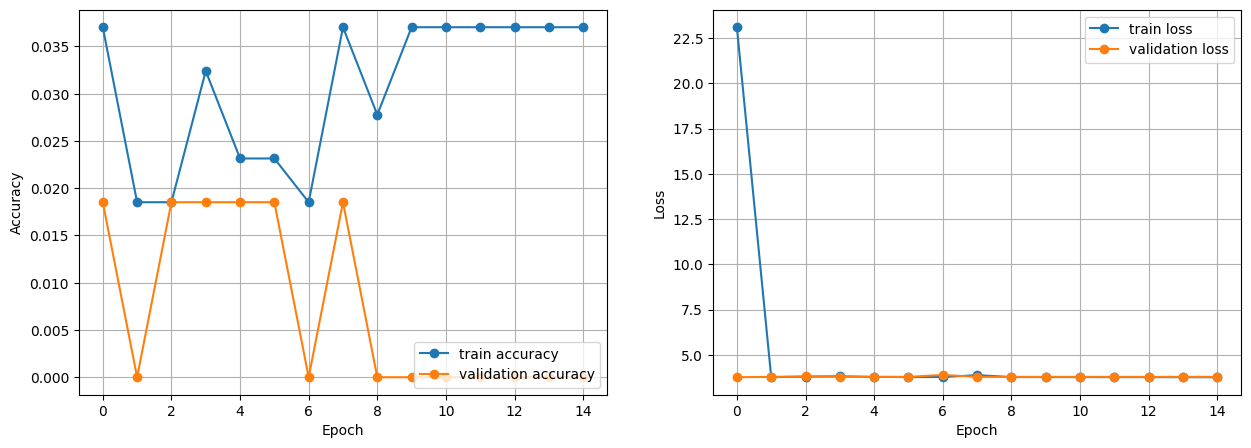

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(X_val, Y_val)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 0.0149 - loss: 3.7832

Test Accuracy: 0.021978022530674934

Test Loss: 3.7836196422576904


In [19]:

predictions = model.predict(X_val)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step


In [20]:

predictions[0]

array([0.0242293 , 0.0239892 , 0.02380944, 0.01978479, 0.02252046,
       0.02175442, 0.02279565, 0.02348957, 0.02312256, 0.02285014,
       0.0240455 , 0.02369054, 0.02339935, 0.02293106, 0.02351377,
       0.02387777, 0.0217442 , 0.02272807, 0.02115692, 0.02276586,
       0.02403734, 0.02231435, 0.02094446, 0.02391401, 0.02178314,
       0.02241707, 0.02251467, 0.02307321, 0.02037781, 0.02378258,
       0.02280195, 0.02305366, 0.0236444 , 0.0210295 , 0.0240957 ,
       0.02107884, 0.02195603, 0.02424856, 0.0209974 , 0.02388661,
       0.02229572, 0.02169011, 0.02287863, 0.02298568], dtype=float32)

In [21]:
np.argmax(predictions[0])

37

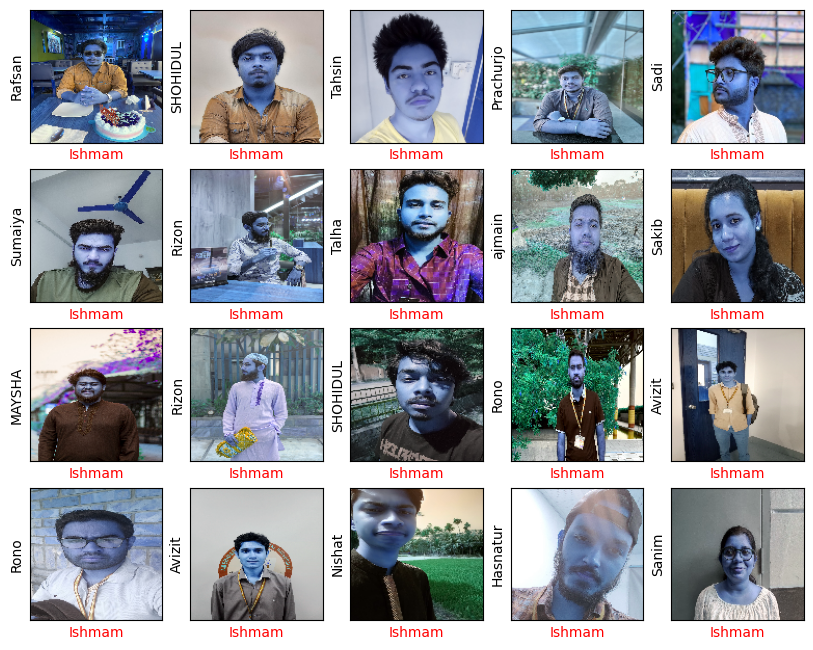

In [22]:
rows = 5
cols = 5

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(rows, cols, i+1)
    plt.imshow(X_val[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_val[i]])
    if Y_val[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

plt.show()

In [24]:
model.save('face_recognization.h5')